In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI(model="gpt-4o-mini")

In [13]:
class BlogState(TypedDict):

    title: str
    content: str
    outline: str
    rating: int

In [5]:
def create_outline(state: BlogState) -> BlogState:

    # extract the title from the state
    title = state["title"]

    # form a prompt
    prompt = f"""
    You are a helpful assistant that can create an outline for a blog post.
    Title: {title}
    Outline:
    """

    # ask the question to the LLM
    outline = model.invoke(prompt).content

    # update the outline in the state
    state["outline"] = outline

    return state

In [6]:
def create_blog(state: BlogState) -> BlogState:

    # extract the title and outline from the state
    title = state["title"]
    outline = state["outline"]

    # form a prompt
    prompt = f"""
    You are a helpful assistant that can create a blog post.
    Title: {title}
    Outline: {outline}
    Blog:

    """

    # ask the question to the LLM
    blog = model.invoke(prompt).content

    # update the blog in the state
    state["content"] = blog

    return state

In [17]:
def rate_blog(state: BlogState) -> BlogState:

    # extract the blog from the state
    title = state["title"]
    content = state["content"]
    outline = state["outline"]

    # form a prompt
    prompt = f"""
    You are a helpful assistant that can rate a blog post.
    title: {title}
    Outline: {outline}
    Content: {content}
    Rating:
    """

    # ask the question to the LLM
    rating = model.invoke(prompt).content

    # update the rating in the state
    state["rating"] = rating

    return state

In [18]:
# create a graph

graph = StateGraph(BlogState)

# add nodes to the 
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)
graph.add_node("rate_blog", rate_blog)

# add edges to the graph
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", "rate_blog")
graph.add_edge("rate_blog", END)

# compile the graph
workflow = graph.compile()

In [19]:
# run the graph
intial_state = {"title": "Rise of AI in India"}
final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'content': '# Rise of AI in India\n\n## Introduction\nArtificial Intelligence (AI) has emerged as one of the most significant technological advancements of our time, driving innovations and transforming economies across the globe. In India, the evolution of AI is not just a trend; it is a catalyst for development and economic growth. As one of the fastest-growing technology hubs, India stands at a pivotal point where AI can significantly impact various sectors. The rise of AI in India is transforming various sectors, driving innovation, and enhancing productivity, thereby shaping the future of the nation.\n\n## 1. Understanding the AI Landscape in India\nTo appreciate the rise of AI in India, it’s essential to understand what AI is. AI refers to the simulation of human intelligence in machines programmed to think and learn. The historical context of AI in India dates back to the 1980s, with early initiatives in computer science and research. However, it

In [20]:
print(final_state['rating'])

Based on the content and outline provided, I would rate the blog post "Rise of AI in India" as follows:

### Overall Rating: 9/10

### Strengths:
1. **Comprehensive Coverage**: The blog thoroughly addresses the rise of AI in India by discussing its significance, current state, applications across various sectors, and the challenges faced. This coverage provides readers with a well-rounded understanding of the topic.
  
2. **Clear Structure**: The structured outline enhances readability, with distinct sections that facilitate navigation. Each section builds logically upon the previous one, making it easy to follow.

3. **Insight into Applications**: The detailed explanations of AI applications in diverse fields such as healthcare, agriculture, finance, education, and manufacturing are particularly strong. This showcases the transformative potential of AI in real-world scenarios.

4. **Government Focus**: Highlighting government initiatives and policies like the National AI Strategy give

In [9]:
print(final_state['outline'])

**Title: Rise of AI in India**

**I. Introduction**
   - Brief overview of artificial intelligence (AI) and its growing importance globally
   - Introduction of the specific focus on India’s AI landscape
   - Importance of discussing the rise of AI in India

**II. Current State of AI in India**
   - Overview of current AI technologies in use (e.g., machine learning, natural language processing)
   - Key industries adopting AI (e.g., healthcare, finance, education, agriculture)
   - Government initiatives and policies supporting AI development (e.g., National AI Strategy, start-up ecosystems)

**III. Factors Contributing to the Rise of AI in India**
   - **A. Demographic Advantages**
      - Young and tech-savvy population
      - Rising number of skilled professionals in STEM fields
   - **B. Increasing Internet Penetration**
      - Growth in digital infrastructure and internet access
      - Impact of mobile technology and affordability
   - **C. Government and Private Sector Investm

In [10]:
print(final_state['content'])

# Rise of AI in India

## I. Introduction

Artificial Intelligence (AI) has emerged as one of the most transformative forces in the modern world, revolutionizing industries and reshaping how we live and work. The growing importance of AI is felt globally, with countries racing to harness its potential for economic growth, social welfare, and competitive advantage. Focusing on India’s AI landscape offers a unique perspective, as the nation is making substantial strides in this transformative technology. This blog post delves into the current state of AI in India, the contributing factors to its rise, successful case studies, challenges, and what the future may hold.

## II. Current State of AI in India

India’s engagement with advanced AI technologies is multifaceted, encompassing machine learning, natural language processing, and robotics. Key industries have promptly adopted these technologies, with healthcare, finance, education, and agriculture leading the charge. 

The Indian gover

In [11]:
print(final_state['title'])

Rise of AI in India


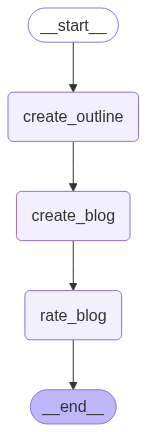

In [21]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())